In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import librosa
import librosa.display

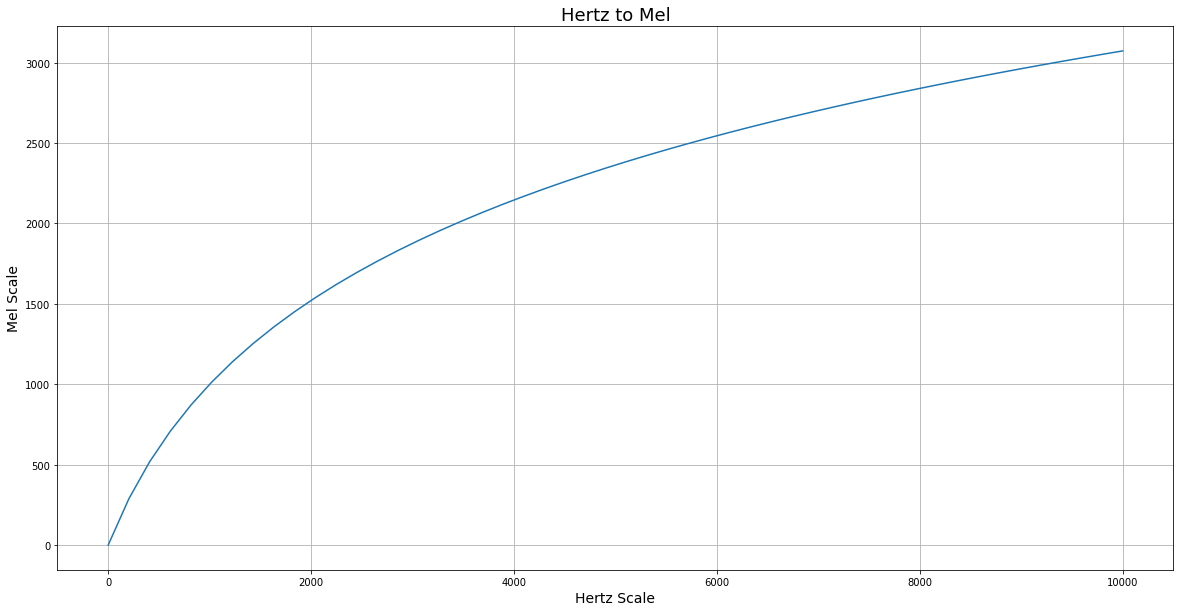

In [3]:

# Create function to convert Hz to Mels
def freqToMel(f):
    return 1127 * math.log(1 + (f/700))

# Vectorize function to apply to numpy arrays
freqToMelv = np.vectorize(freqToMel)

# Observing 0 to 10,000 Hz
Hz = np.linspace(0,1e4) 
# Now we just apply the vectorized function to the Hz variable
Mel = freqToMelv(Hz) 

# Plotting the figure:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(Hz, Mel)
plt.title('Hertz to Mel',fontsize=18)
plt.xlabel('Hertz Scale',fontsize=14)
plt.ylabel('Mel Scale',fontsize=14)
plt.grid(True,'both')
plt.show()

In [4]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt

[array([], dtype=float64)]


/var/folders/gd/mvj_v_yd2d595zjv_0952tyc0000gn/T/ipykernel_75493/436344249.py:12: RuntimeWarning: divide by zero encountered in log10
  response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))


Text(0.5, 0, 'Normalized frequency [cycles per sample]')

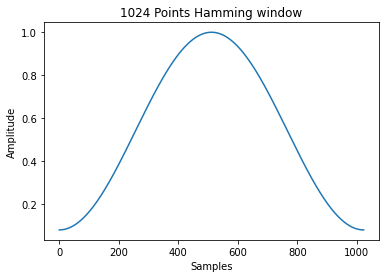

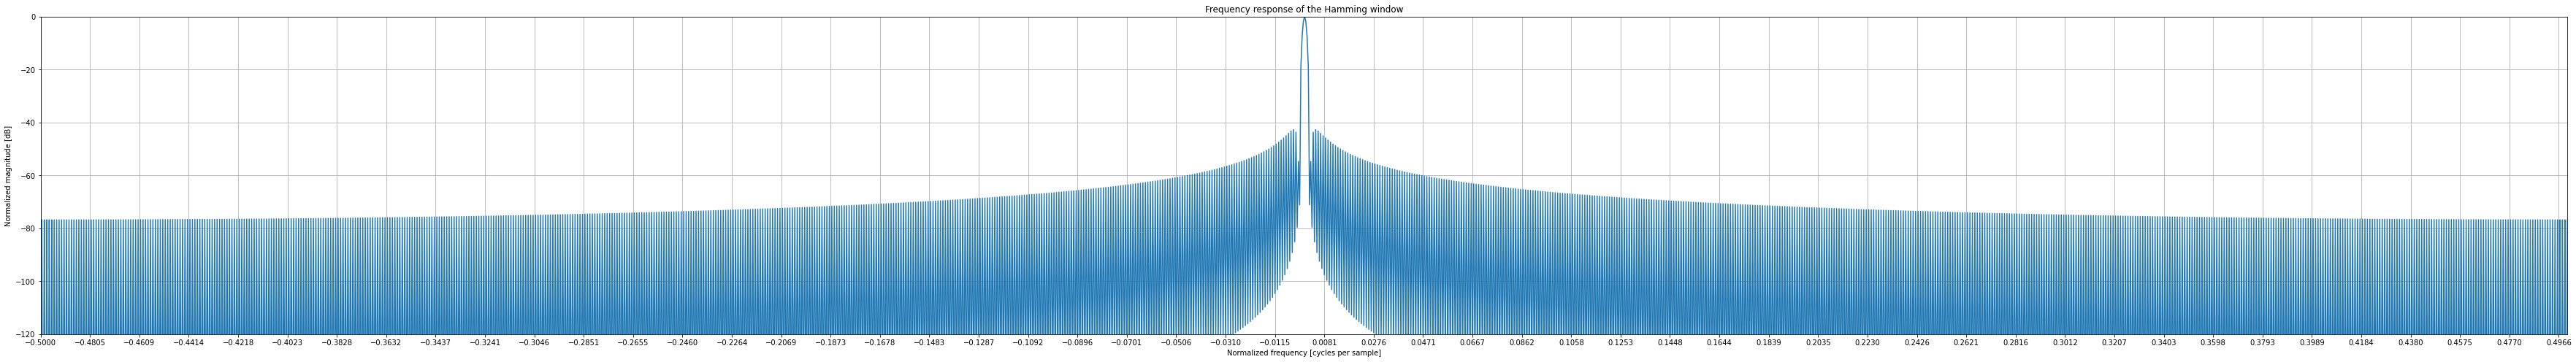

In [5]:
M = 256
hammingWindowDataArray = signal.hamming(M)
plt.plot(hammingWindowDataArray)
plt.title("{} Points Hamming window".format(M))
plt.ylabel("Amplitude")
plt.xlabel("Samples")

plt.figure(figsize=(62,8))
A = fft(hammingWindowDataArray, 2048) / (len(hammingWindowDataArray)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
# print(freq)
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))

# Find size of main Lobe
print([freq[i] for i in np.where(response == -104.50169732125902)])

plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.grid(True,'both')
plt.xticks([freq[i] for i in range(0,len(freq),40)])
plt.title("Frequency response of the Hamming window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")